# 시계열 자료 분석 과제1

# 201822037 통계학과 한민주

----

### 2.1 최근 10일 동안 판매된 경제 서적에 대한 상수평균모형

In [117]:
library(dplyr)
library(lmtest)
library(forecast)

In [1]:
booksales = c(52,46,46,52,50,50,48,45,41,53)

In [4]:
booksales %>% mean

[1] 48.3

상수평균모형은 $Z_{t} = \beta_0 +\epsilon_t$ , $\epsilon_t\sim_{iid} N(0 , \sigma^2)$ 이고,
$\hat{\beta}_0 = \overline{z} = 48.3$ 이다.


미래값 $Z_{10+l}$에 대한 예측값 $\hat{Z}_{10}(l) = \overline{z}$ 이므로 48.3이다.

### 2.2 편의점의 15주간 매출액에 대한 선형추세모형

#### 1)

선형추세모형은 $Z_t = \beta_0 + \beta_1t + \epsilon_t$ , $\epsilon_t\sim_{iid} N(0 , \sigma^2)$ 이다.

여기에서 $\beta_0 + \beta_1t$는 선형추세성분이다.

#### 2)

In [18]:
t= 1:15
sales = c(303, 298 , 303 ,314, 303, 314, 310 , 324 , 317, 327 , 323,324, 331,330 ,332)
sale = data.frame(t=t , sales =sales)
sale %>% head

,t,sales
,<int>,<dbl>
1,1,303
2,2,298
3,3,303
4,4,314
5,5,303
6,6,314


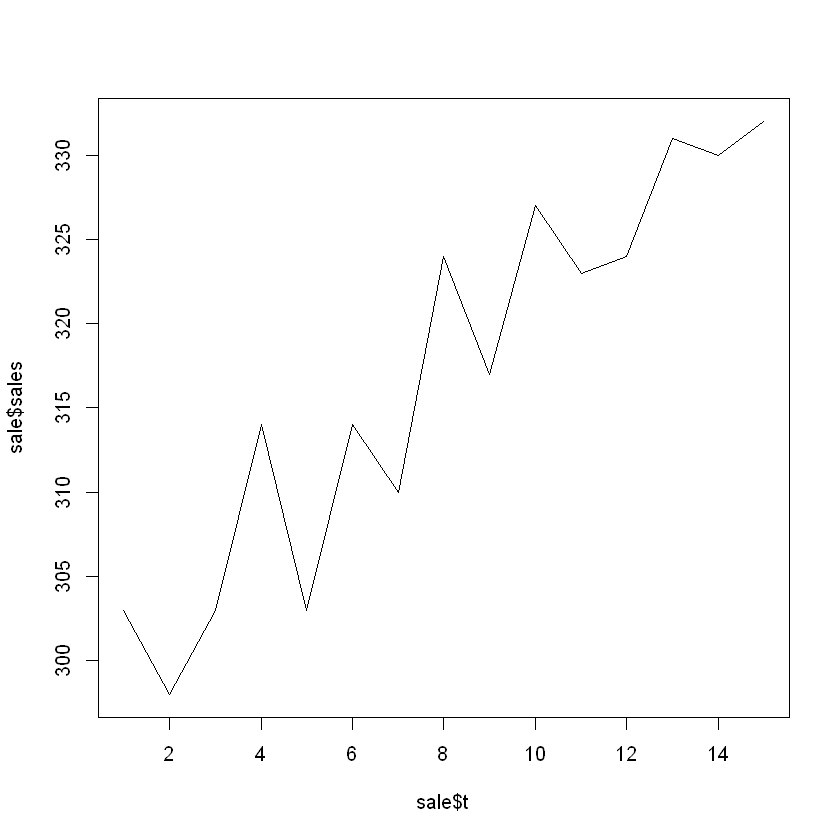

In [21]:
plot(sale$t,sale$sales , type = "l")

- 직선형의 증가 추세가 있다.

In [11]:
# 모형적합
model = lm(sales ~ t )

In [13]:
summary(model)


Call:
lm(formula = sales ~ t)

Residuals:
   Min     1Q Median     3Q    Max 
-6.710 -2.331 -1.181  2.519  7.133 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  297.781      2.364 125.964  < 2e-16 ***
t              2.386      0.260   9.176 4.84e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.351 on 13 degrees of freedom
Multiple R-squared:  0.8662,	Adjusted R-squared:  0.856 
F-statistic: 84.19 on 1 and 13 DF,  p-value: 4.836e-07


- 두 회귀계수 $\beta_0 = 297.8, \beta_1 = 2.4$ 의 p-value가 매우 작으므로 유의하다.
- 결정계수가 $R^2 = 85.6% $ 으로 설명력이 높다. 
- 추정된 모형식은 $\widehat{sales_t} = 297.8 + 2.4t$ 이다.

In [23]:
sale[, "fitted_sales"] = fitted(model)

In [25]:
sale%>% head

,t,sales,fitted_sales
,<int>,<dbl>,<dbl>
1,1,303,300.1667
2,2,298,302.5524
3,3,303,304.9381
4,4,314,307.3238
5,5,303,309.7095
6,6,314,312.0952


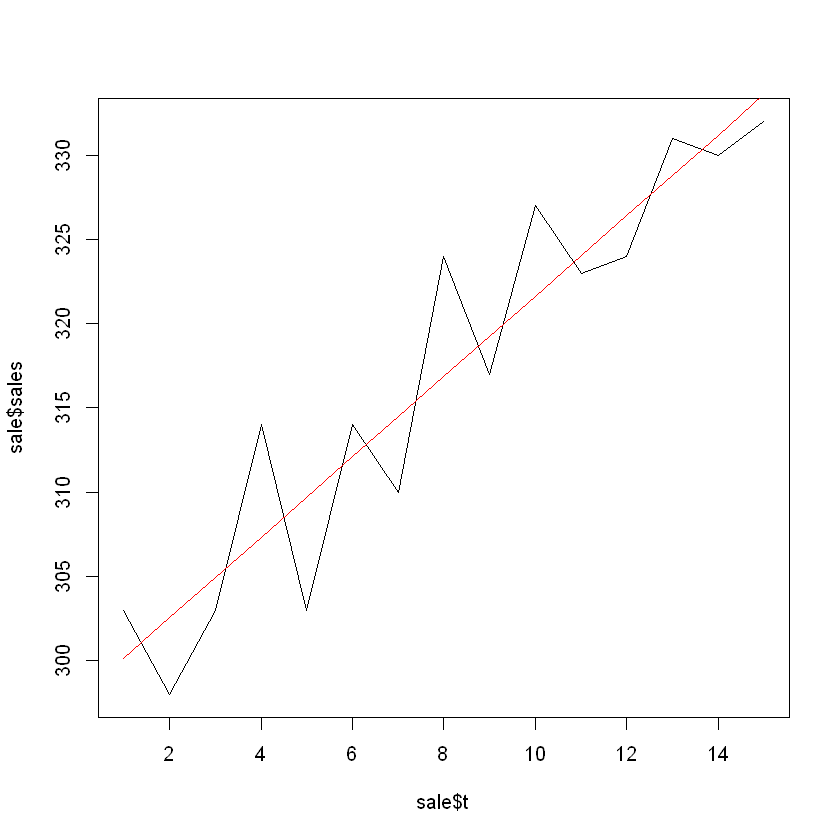

In [29]:
# 원데이터 vs. 적합된 추세 모형
plot(sale$t , sale$sales , type = "l")
lines(sale$t , sale$fitted_sales , col ="red")

- 원데이터의 추세를 적합값이 잘 따르고 있다.

회귀진단

In [31]:
sale[,"res"] = resid(model)
sale %>% head

,t,sales,fitted_sales,res
,<int>,<dbl>,<dbl>,<dbl>
1,1,303,300.1667,2.833333
2,2,298,302.5524,-4.552381
3,3,303,304.9381,-1.938095
4,4,314,307.3238,6.676190
5,5,303,309.7095,-6.709524
6,6,314,312.0952,1.904762


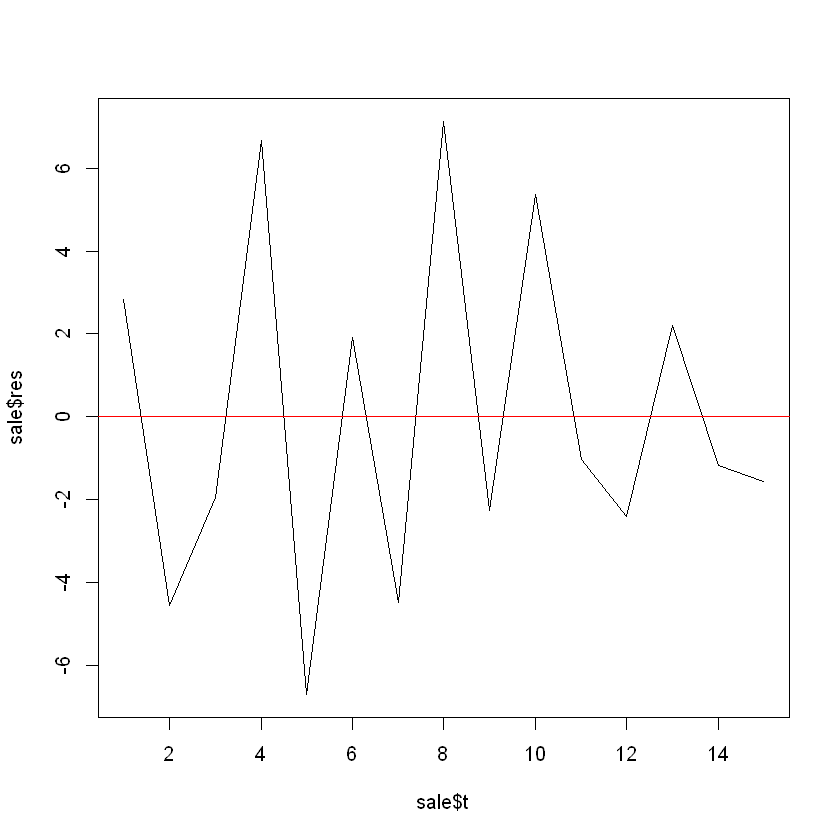

In [38]:
plot(sale$t , sale$res , type = "l")
abline(h=0 , col = "red")

- 잔차들이 0을 근처로 왔다갔한다.

--> 선형성 만족
- 잔차 시계열 그림에서 잔차들이 시간에 따른 음의 상관관계를 갖는 것처럼 보인다.

In [46]:
dwtest(model , alternative = "less")


	Durbin-Watson test

data:  model
DW = 3.1954, p-value = 0.00952
alternative hypothesis: true autocorrelation is less than 0


- 더빈왓슨 통계량이 3.2로 4에 가깝다.

- H0: uncorrelated vs. H1: rho <0 인 단측검정 시행 시 p-value가 매우 유의하게 나오므로 잔차들이 음의 자기상관관계가 있다고 결론 내린다.

--> 오차항의 독립성 위배

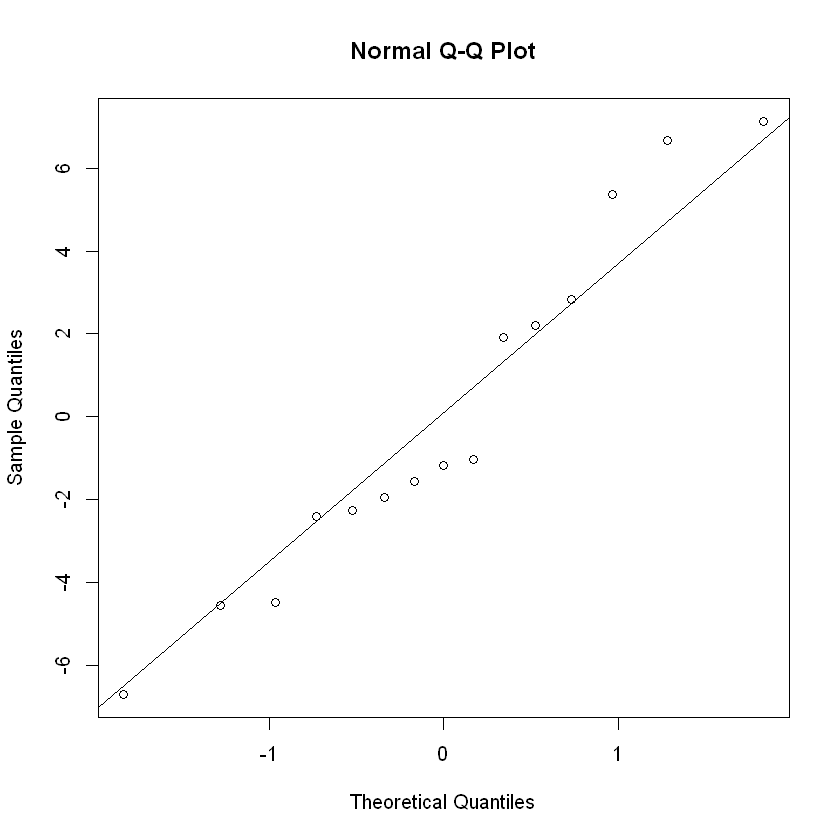

In [47]:
qqnorm(sale$res)
qqline(sale$res)

- 점들이 대체로 직선을 따라간다.

--> 정규성 만족

In [49]:
bptest(model) # Breusch - Pagan test


	studentized Breusch-Pagan test

data:  model
BP = 1.9559, df = 1, p-value = 0.1619


- H0: 등분산이다. vs. H1: 이분산이다.
- p-value가 0.16이므로 유의수준 0.05 하에서 영가설을 기각하지 못한다.

--> 등분산성 만족

<회귀진단 결론>
- 잔차들이 선형성, 정규성, 등분산성을 만족하나 독립성을 만족하지 못한다.

#### 3)

In [57]:
297.8  + 2.4*15

[1] 333.8

- 추정된 모형식이 $\widehat{sales_t} = 297.8 + 2.4t$ 이므로
$\hat{Z}_{15}(l) =  297.8 + 2.4 \times (15+l)$이다.
- 따라서 $\hat{Z}_{15}(l) = 333.8$

### 3.1 평활법

#### 1) `female.txt`: 월별 행정직 여성 근로자 수

In [64]:
setwd("C:/Users/user/OneDrive/바탕 화면/전공 수업 자료/시계열자료분석_이영미/제5판_시계열분석/data")

In [108]:
data = read.table("female.txt")
names(data)[1]= "female"
data %>% head

,female
,<int>
1,216
2,223
3,229
4,235
5,227
6,236


In [110]:
# 시계열 데이터로 변환
female = ts(data[1] ,start = c(1984,1)  , frequency = 12)
female

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1984,216,223,229,235,227,236,232,234,237,238,244,270
1985,278,277,274,285,262,243,241,238,259,267,272,269
1986,262,276,297,327,341,323,317,322,337,330,329,342
1987,349,346,345,354,345,354,343,355,362,366,367,348
1988,355,362,373,370,375,395,405,408,399,402,403,402
1989,398,408,427,427,433,442,397,416,425,424,434,434
1990,432,440,469,486,495,506,514,529,528,529,521,537
1991,537,544,557,556,561,569,578,589,570,563,566,571
1992,574,569,596,610,627,655,670,663,664,668,664,667


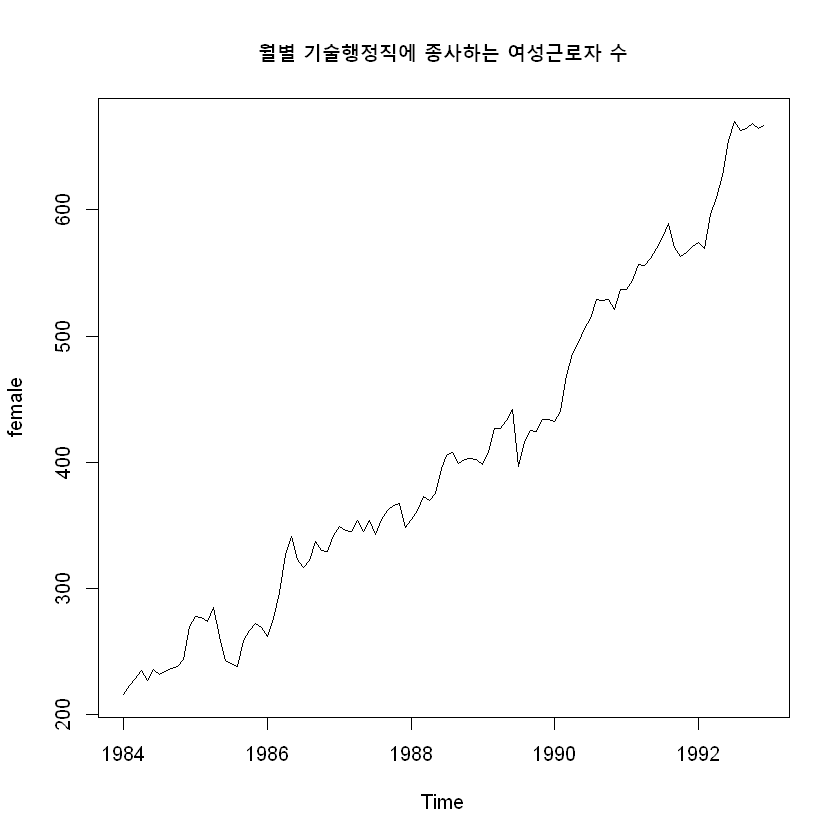

In [111]:
plot.ts(female , main = "월별 기술행정직에 종사하는 여성근로자 수")

- 시계열 자료가 선형추세에 따라 증가하고 있다.

-> 이중지수평활법 적용

In [118]:
fit = holt(female , h =6 )

- Holt - Winters의 이중지수평활법
- 6개월 뒤까지 예측(h=6)
- alpha, beta의 값을 주지 않음으로써 최적의 모수를 자체적으로 추정하도록 함

In [119]:
fit$model

Holt's method 

Call:
 holt(y = female, h = 6) 

  Smoothing parameters:
    alpha = 0.9825 
    beta  = 1e-04 

  Initial states:
    l = 214.2297 
    b = 4.1229 

  sigma:  11.4927

     AIC     AICc      BIC 
1039.003 1039.592 1052.414 

- alpha(레벨): 0.9825
- beta(기울기): 1e-04

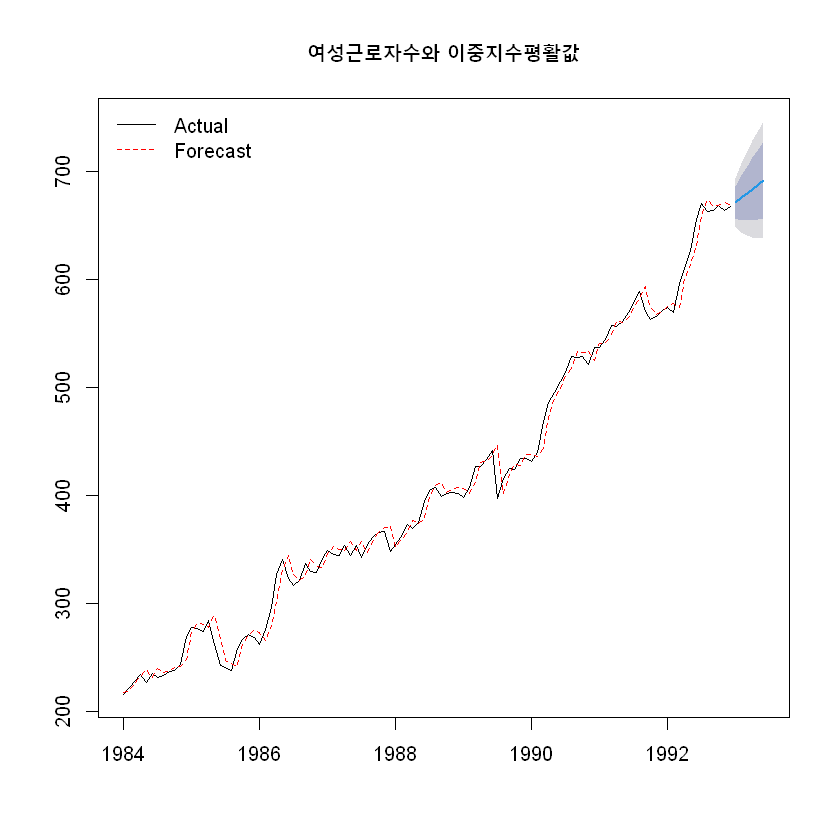

In [129]:
plot(fit, main = "여성근로자수와 이중지수평활값")
lines(fitted(fit), col ="red" , lty =2)
legend("topleft", lty = 1:2 , col =c("black" , "red" ) ,c("Actual" , "Forecast"),bty = "n")

- 마지막 추세의 데이터들의 기울기가 완만해서 이후 6개월 간의 데이터도 완만한 기울기로 예측되고 있다.

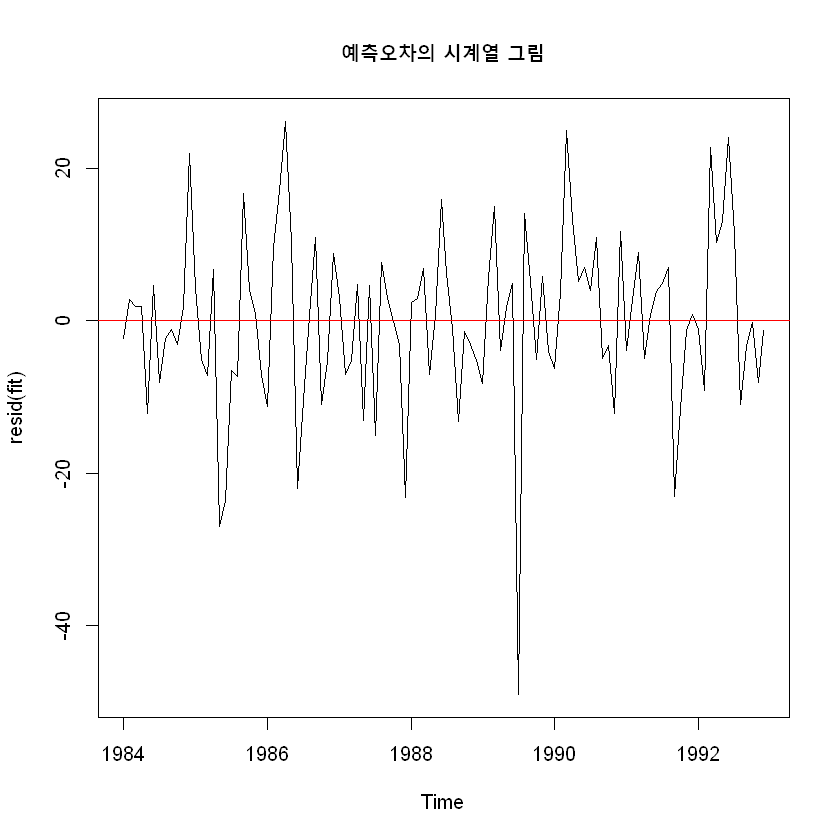

In [158]:
plot(resid(fit) , main = "예측오차의 시계열 그림")
abline(h=0,col = "red")

- 잔차가 0을 중심으로 왔다갔다하고 있으므로 적절한 평활법을 쓴 거 같다.

#### 2) `book.txt`: 일별 베스트셀러 판매부수

In [165]:
data = read.table("book.txt")
names(data)[1] = "circulation"
data %>% head

,circulation
,<int>
1,12
2,15
3,17
4,21
5,25
6,28


In [170]:
# 시계열 data로 변환
circulation = ts(data[1] , start = c(2000,1) , frequency = 365)
circulation %>% head

circulation
12
15
17
21
25
28


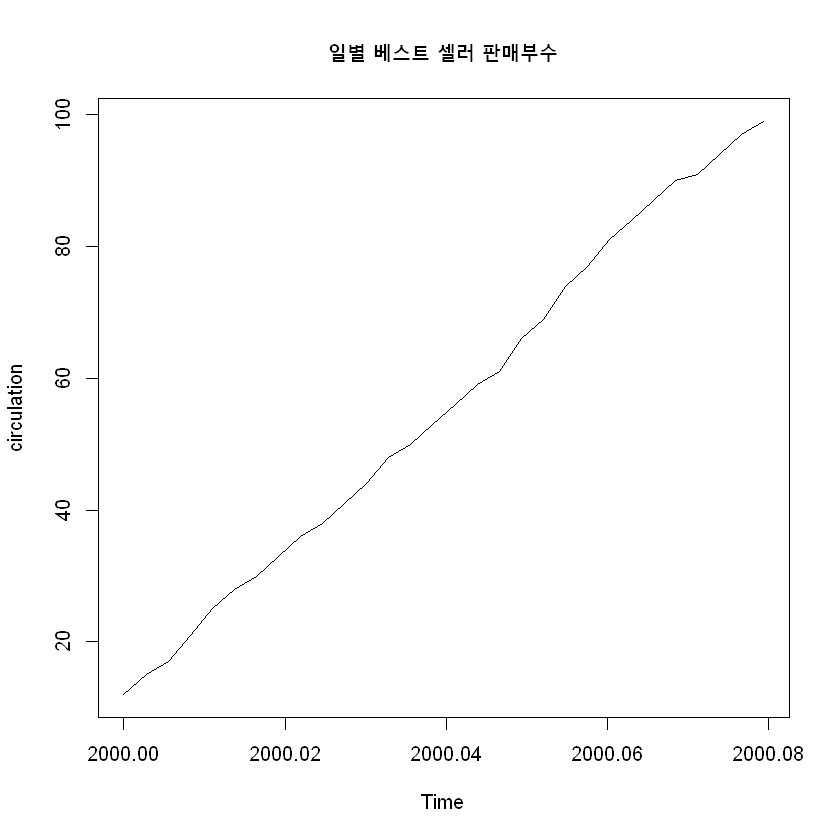

In [171]:
plot.ts(circulation , main = "일별 베스트 셀러 판매부수")

- 시계열 자료가 선형추세에 따라 증가하고 있다.

-> 이중지수평활법 적용

In [172]:
fit2 = holt(circulation , h =6 )

- Holt - Winters의 이중지수평활법
- 6개월 뒤까지 예측(h=6)
- alpha, beta의 값을 주지 않음으로써 최적의 모수를 자체적으로 추정하도록 함

In [173]:
fit2$model

Holt's method 

Call:
 holt(y = circulation, h = 6) 

  Smoothing parameters:
    alpha = 0.9629 
    beta  = 1e-04 

  Initial states:
    l = 9.2938 
    b = 3.0224 

  sigma:  0.9185

     AIC     AICc      BIC 
102.6415 105.1415 109.6475 

- alpha(레벨): 0.9629
- beta(기울기): 1e-04

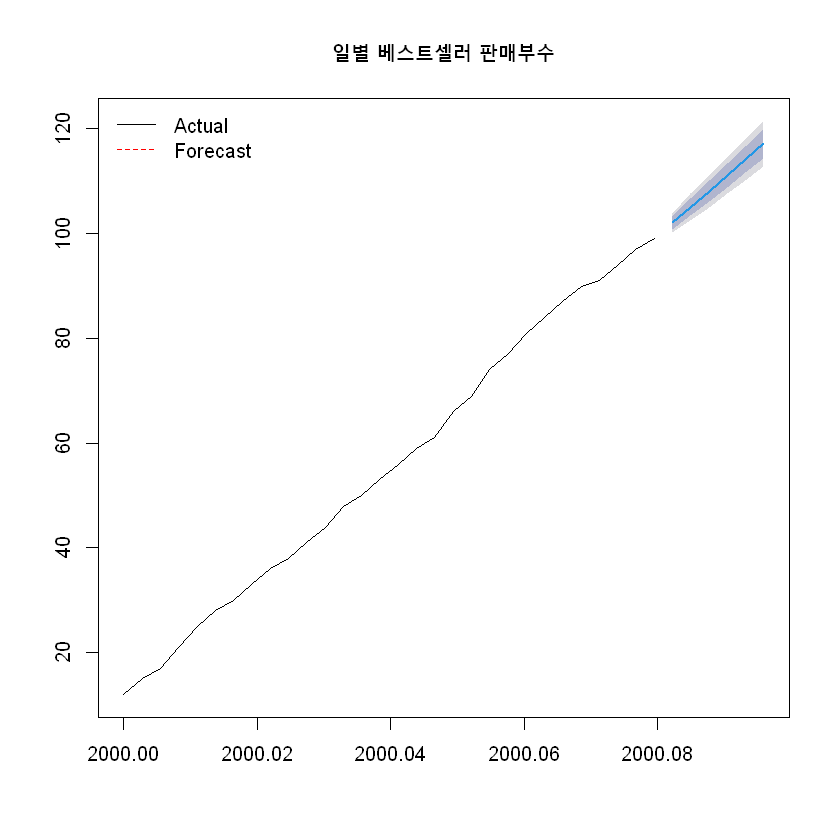

In [174]:
plot(fit2, main = "일별 베스트셀러 판매부수")
lines(fitted(fit), col ="red" , lty =2)
legend("topleft", lty = 1:2 , col =c("black" , "red" ) ,c("Actual" , "Forecast"),bty = "n")

- 이전의 데이터가 증가하는 추세대로 6개월 후 예측값도 꾸준히 증가하고 있다.

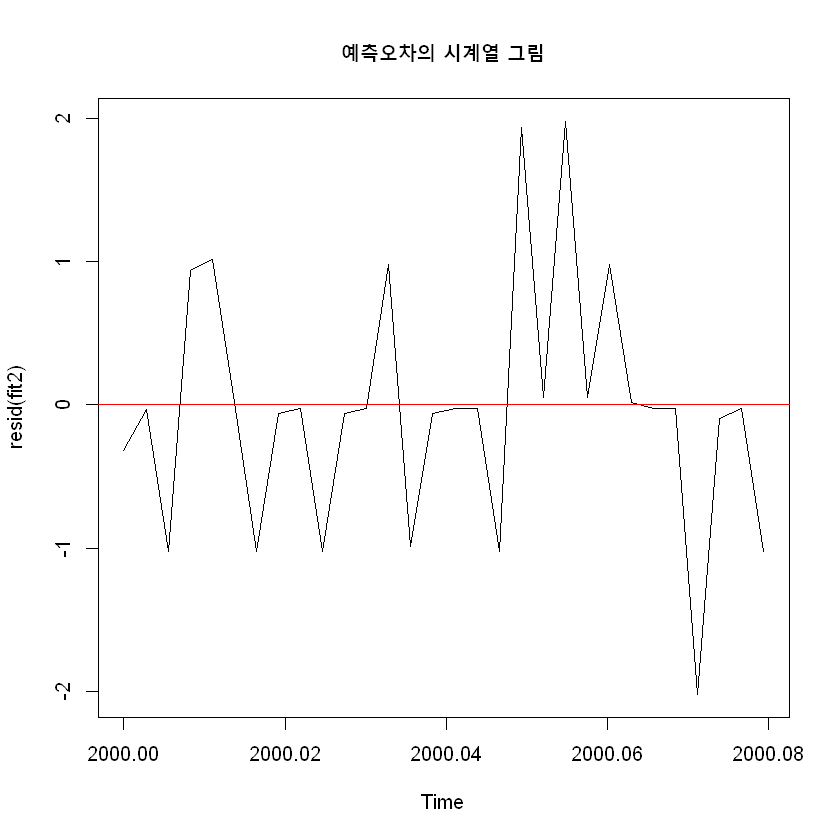

In [175]:
plot(resid(fit2) , main = "예측오차의 시계열 그림")
abline(h=0,col = "red")

- 잔차가 0을 중심으로 퍼져있지만 2000.05 전까지의 잔차에 약간의 규칙성이 보인다.
- 그러나 시계열 데이터의 plot을 보면 이중지수평활법을 적용하는 것이 가장 적절해 보인다.